#Kernel and Data Processing

In [ ]:
import numpy as np

In [ ]:
input=np.random.randint(20,size=(4,4))
kernel=np.random.randint(5,size=(2,2))
input_length=input.shape[0]
input_width=input.shape[1]
kernel_length=kernel.shape[0]
kernel_width=kernel.shape[1]

In [ ]:
output_length=input_length-kernel_length+1
output_width=input_width-kernel_width+1
output=np.zeros((output_length,output_width))

In [ ]:
for i in range(0,output_length):
  for j in range(0,output_width):
    for ii in range(0,kernel_length):
      for jj in range(0,kernel_width):
        output[i,j]+=input[i+ii,j+jj]*kernel[ii,jj]

In [ ]:
print(input,"\n",kernel,"\n",output)

[[16 11 19  6]
 [15  0  3  5]
 [10  4  6  3]
 [ 4 16  5  2]] 
 [[1 0]
 [2 3]] 
 [[46. 20. 40.]
 [47. 26. 24.]
 [66. 51. 22.]]


# Fashion MNIST CNN Classification

In [ ]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
# Since we will be using a functional API we import in this manner
from tensorflow.keras.layers import Dense,Input,Conv2D,Flatten,Dropout
from tensorflow.keras.models import Model  
import tensorflow as tf

In [ ]:
# Now we will import the already existing Fashion MNIST Dataset from tensorflow
data=tf.keras.datasets.fashion_mnist
# By calling the load_data() we will get two set of tuples for training and validation
(X_train,y_train),(X_test,y_test)=data.load_data()

In [ ]:
# Now our next step will be to normalise
X_train=X_train/255.0
X_test=X_test/255.0
# Since it is a CNN Model, it will require a vector of the from N X K X K X C
# Here N is the number of features
# K is the dimensions of the picture in terms of pixels
# C is the colour. Here it being a grayscale, we will have C=1
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# Here we will see the length of the output class i.e. number of unique items
print(len(set(y_train)))
K=len(set(y_train))

10


In [ ]:
# plt.imshow(X_train[0].reshape(28,28),cmap='gray')
# print(y_train[0])
# Now let us build the model
i=Input(shape=X_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i) # Here 32 represents the number of featurs. Strides represent the division. 
x=Conv2D(64,(3,3),strides=2,activation='relu')(x) # Tuple represets the shape of the filter
x=Conv2D(128,(3,3),strides=2,activation='relu')(x) 
x=Flatten()(x) #Flatten is the stacking up of all layers
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)
model=Model(i,x)

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#Fitting the model on the dataset
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.6910 - accuracy: 0.7476 - val_loss: 0.3981 - val_accuracy: 0.8505
Epoch 2/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3712 - accuracy: 0.8611 - val_loss: 0.3408 - val_accuracy: 0.8749
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3183 - accuracy: 0.8796 - val_loss: 0.3129 - val_accuracy: 0.8840
Epoch 4/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2793 - accuracy: 0.8959 - val_loss: 0.3064 - val_accuracy: 0.8869
Epoch 5/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2549 - accuracy: 0.9032 - val_loss: 0.3047 - val_accuracy: 0.8873
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2263 - accuracy: 0.9144 - val_loss: 0.2939 - val_accuracy: 0.8944
Epoch 7/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2079 - accuracy: 0.9209 - val_loss: 0.2994 -

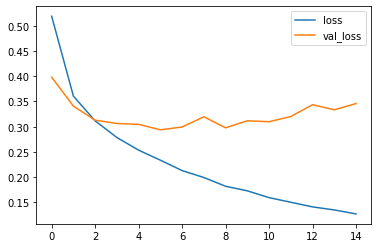

In [ ]:
# Here we will plot to see how it went
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

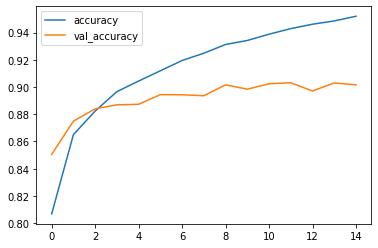

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()


In [ ]:
pred=model.predict(X_test).argmax(axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[839   1  22  16   4   2 111   0   5   0]
 [  4 980   2   8   3   0   2   0   1   0]
 [ 12   0 858  10  43   0  75   0   2   0]
 [ 22   6  16 902  29   0  25   0   0   0]
 [  0   0  76  18 831   0  73   0   2   0]
 [  1   0   0   2   0 971   0  19   1   6]
 [ 91   1  60  22  80   1 736   0   9   0]
 [  0   0   0   0   0   9   0 975   0  16]
 [  4   0   7   3   4   3   7   4 968   0]
 [  0   0   0   0   0   5   1  37   1 956]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.82      0.86      0.84      1000
           3       0.92      0.90      0.91      1000
           4       0.84      0.83      0.83      1000
           5       0.98      0.97      0.98      1000
           6       0.71      0.74      0.73      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.98     

In [ ]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

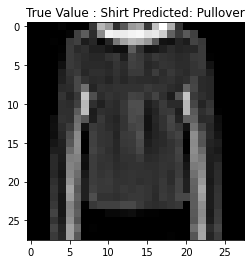

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(pred!= y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True Value : %s Predicted: %s" % ( labels[y_test[i]],labels[pred[i]]));

# CNN Cifar Model

In [ ]:
# Again we are importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Input,Conv2D,GlobalMaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
data=tf.keras.datasets.cifar10
(X_train,y_train),(X_test,y_test)=data.load_data()

In [ ]:
# Now we perform the little data preprocessing
X_test,X_train=X_test/255.0,X_train/255.0
y_test,y_train=y_test.flatten(),y_train.flatten()

In [ ]:
# Here we will check for the correct dimensions
print(X_test.shape)
print(y_test.shape)
k=len(set(y_test))
print(k)

(10000, 32, 32, 3)
(10000,)
10


In [ ]:
# Now we will create the model
i=Input(shape=X_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.5)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)
model=Model(i,x)

In [ ]:
# Now we will compile and fit the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7312 - accuracy: 0.3612 - val_loss: 1.3088 - val_accuracy: 0.5322
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3008 - accuracy: 0.5285 - val_loss: 1.1173 - val_accuracy: 0.5993
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1545 - accuracy: 0.5832 - val_loss: 1.0319 - val_accuracy: 0.6321
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0608 - accuracy: 0.6227 - val_loss: 0.9910 - val_accuracy: 0.6463
Epoch 5/20
1563/1563 [==============================] - 5s 4ms/step - loss: 0.9815 - accuracy: 0.6483 - val_loss: 0.9438 - val_accuracy: 0.6776
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9110 - accuracy: 0.6750 - val_loss: 0.8994 - val_accuracy: 0.6897
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8626 - accuracy: 0.6914 - val_loss: 0.8644 - val_accuracy:

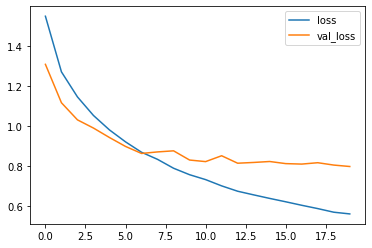

In [ ]:
# We will plot the graphs now
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

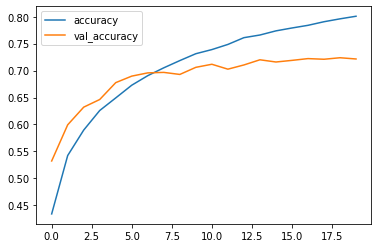

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
pred=model.predict(X_test).argmax(axis=1)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[735  18  36  14  26   6  15   5 103  42]
 [ 14 842   3   4   4   4  14   0  37  78]
 [ 73   7 549  77 110  48  79  22  19  16]
 [ 20  10  54 555  79 144  71  33  19  15]
 [ 18   4  54  55 714  31  51  55  11   7]
 [ 15   3  47 221  50 560  35  52   7  10]
 [  9   8  22  59  40  19 822   7  12   2]
 [ 11   4  28  39  82  52  10 750   7  17]
 [ 43  19   7  11   5   5   7   3 877  23]
 [ 34  79   7  11   4   4   4  15  31 811]]


In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

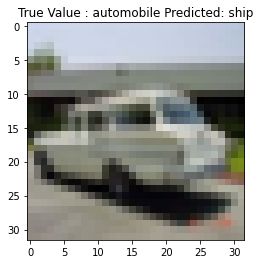

In [ ]:
misclassified_idx = np.where(pred!= y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i])
plt.title("True Value : %s Predicted: %s" % ( labels[y_test[i]],labels[pred[i]]));

# CNN Cifar with Data Augmentation

In [40]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Input,Flatten,Conv2D,GlobalMaxPooling2D,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
data=tf.keras.datasets.cifar10

In [42]:
(X_train,y_train),(X_test,y_test)=data.load_data()

In [43]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

In [44]:
X_train,X_test=X_train/255.0,X_test/255.0
y_train,y_test=y_train.flatten(),y_test.flatten()

In [45]:
print(X_train[0].shape)
k=len(set(y_test))
print(k)

(32, 32, 3)
10


In [46]:
i=Input(shape=X_train[0].shape)
# x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
# x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
# x=Conv2D(128,(3,3),strides=2,activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)
model=Model(i,x)

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
1563/1563 [==============================] - 30s 18ms/step - loss: 1.7111 - accuracy: 0.4496 - val_loss: 1.0431 - val_accuracy: 0.6270
Epoch 2/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8798 - accuracy: 0.6901 - val_loss: 0.7553 - val_accuracy: 0.7417
Epoch 3/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6960 - accuracy: 0.7582 - val_loss: 0.7357 - val_accuracy: 0.7434
Epoch 4/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.5839 - accuracy: 0.7958 - val_loss: 0.6873 - val_accuracy: 0.7700
Epoch 5/50
1563/1563 [==============================] - 27s 18ms/step - loss: 0.4826 - accuracy: 0.8365 - val_loss: 0.6104 - val_accuracy: 0.7932
Epoch 6/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.4021 - accuracy: 0.8621 - val_loss: 0.6873 - val_accuracy: 0.7844
Epoch 7/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.3364 - accuracy: 0.8828 - val_loss: 0.6454 -

In [49]:
# batch_size = 32
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# train_generator = data_generator.flow(X_train, y_train, batch_size)
# steps_per_epoch = X_train.shape[0] // batch_size
# r = model.fit(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

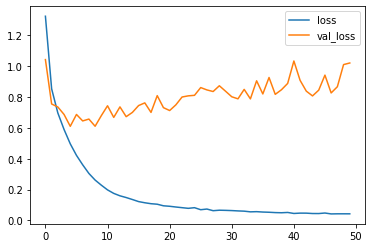

In [50]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

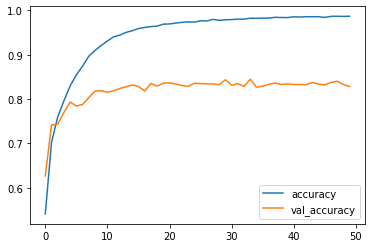

In [51]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [52]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        1849

Confusion matrix, without normalization
[[861   9  28  21   6   2   8  12  34  19]
 [  6 943   1   5   1   3   3   0  11  27]
 [ 42   5 735  52  36  57  38  24   6   5]
 [ 16   4  43 700  18 147  35  16  11  10]
 [ 13   1  64  80 707  34  35  63   2   1]
 [  5   6  26 119  16 797   7  20   1   3]
 [  8   2  30  57   5  21 868   1   6   2]
 [ 10   1  15  20  15  46   2 886   2   3]
 [ 42  16   8  12   1   5   1   5 895  15]
 [ 11  63   2   9   1   8   1   4  10 891]]


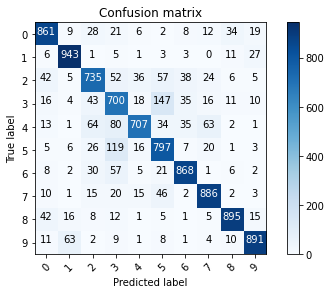

In [53]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



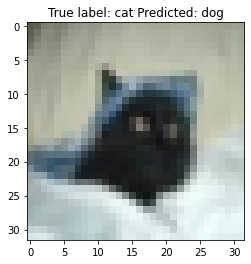

In [55]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));